# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Fathurrahman
- **Email:** fathur.071203@gmail.com
- **ID Dicoding:** fathur071203

## Menentukan Pertanyaan Bisnis

- Kapan Hari-hari paling sibuk dalam penyewaaan sepeda?
- Bagaimana pola tren peminjaman sepeda di setiap musim untuk masing-masing tahun?
- Bagaimana tren peminjaman sepeda dari tahun 2011 hingga 2012?
- Bagaimana pola peminjaman sepeda berdasarkan jam pada hari-hari tertentu?
- Bagaimana perbandingan tren peminjaman sepeda antara pengguna terdaftar dan tidak terdaftar pada hari tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Wrangling

### Gathering Data

**Insight:**
Bike Sharing Dataset adalah kumpulan data yang merekam pola penyewaan sepeda di Washington D.C. dari tahun 2011 hingga 2012. Dataset ini dikumpulkan dari sistem Capital Bikeshare dan dikaitkan dengan faktor lingkungan serta musiman, seperti cuaca, suhu, kelembaban, dan hari kerja atau libur.

Dataset ini terdiri dari dua file utama:

    - hour.csv - Data penyewaan sepeda yang dikumpulkan setiap jam (17.379 entri).
    - day.csv - Data penyewaan sepeda yang dikumpulkan setiap hari (731 entri).

**Tabel: day.csv**  
| Kolom       | Deskripsi |
|-------------|-----------|
| instant     | Indeks rekaman data (nomor urut setiap entri). |
| dteday      | Tanggal pencatatan data. |
| season      | Musim saat data dicatat (1: Spring, 2: Summer, 3: Fall, 4: Winter). |
| yr          | Tahun data dicatat (0: 2011, 1: 2012). |
| mnth        | Bulan dalam setahun (1 hingga 12). |
| holiday     | Indikator hari libur. |
| weekday     | Hari dalam seminggu. |
| workingday  | Indikator hari kerja (1: Hari kerja, 0: Bukan hari kerja). |
| weathersit  | Kondisi cuaca (1: Cerah, 2: Berkabut, 3: Hujan ringan, 4: Hujan lebat/salju). |
| temp        | Suhu yang dinormalisasi (skala 0-1, dibagi dengan 41°C). |
| atemp       | Suhu yang dirasakan (skala 0-1, dibagi dengan 50°C). |
| hum         | Kelembaban udara yang dinormalisasi (skala 0-1, dibagi dengan 100%). |
| windspeed   | Kecepatan angin yang dinormalisasi (skala 0-1, dibagi dengan 67). |
| casual      | Jumlah pengguna sepeda yang tidak terdaftar. |
| registered  | Jumlah pengguna sepeda yang terdaftar. |
| cnt         | Total jumlah sepeda yang disewa (casual + registered). |

---

**Tabel: hour.csv**  
| Kolom       | Deskripsi |
|-------------|-----------|
| instant     | Indeks rekaman data (nomor urut setiap entri). |
| dteday      | Tanggal pencatatan data. |
| season      | Musim saat data dicatat (1: Spring, 2: Summer, 3: Fall, 4: Winter). |
| yr          | Tahun data dicatat (0: 2011, 1: 2012). |
| mnth        | Bulan dalam setahun (1 hingga 12). |
| hr          | Jam dalam sehari (0 hingga 23). |
| holiday     | Indikator hari libur. |
| weekday     | Hari dalam seminggu. |
| workingday  | Indikator hari kerja (1: Hari kerja, 0: Bukan hari kerja). |
| weathersit  | Kondisi cuaca (1: Cerah, 2: Berkabut, 3: Hujan ringan, 4: Hujan lebat/salju). |
| temp        | Suhu yang dinormalisasi (skala 0-1, dibagi dengan 41°C). |
| atemp       | Suhu yang dirasakan (skala 0-1, dibagi dengan 50°C). |
| hum         | Kelembaban udara yang dinormalisasi (skala 0-1, dibagi dengan 100%). |
| windspeed   | Kecepatan angin yang dinormalisasi (skala 0-1, dibagi dengan 67). |
| casual      | Jumlah pengguna sepeda yang tidak terdaftar. |
| registered  | Jumlah pengguna sepeda yang terdaftar. |
| cnt         | Total jumlah sepeda yang disewa (casual + registered). |



In [2]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [4]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

#### Check Summary

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Adanya feature 'dteday' yang harus disesuaikan tipe datanya menjadi datetime.
- Tidak adanya indikasi perbedaan jumlah data pada setiap feature (missing value)

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Sama seperti tabel day_df feature 'dteday' yang harus disesuaikan tipe datanya menjadi datetime.
- Tidak adanya indikasi perbedaan jumlah data pada setiap feature (missing value)

#### Misssing Value

In [12]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak adanya perbedaan jumlah data yang mengindikasikan Missing Value 


In [13]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Sama halnya pada tabel hour_df Tidak adanya perbedaan jumlah data yang mengindikasikan Missing Value

#### Duplicated Data

In [14]:
day_df.duplicated().sum()

np.int64(0)

In [15]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak adanya duplikasi data pada "hour_df" dan "day_df". Hal ini mungkin karena feature instants yang merupakan urutan data yang memiliki nilai unik yang membuat tiap datanya berbeda

#### Check Outliers

In [16]:
numericalday_columns = [x for x in day_df.select_dtypes(include='number').columns if x != 'instant']
numericalday_columns

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

pada kode ini kita kan menggolongkan feature mana yang bertipe numerical pada day_df

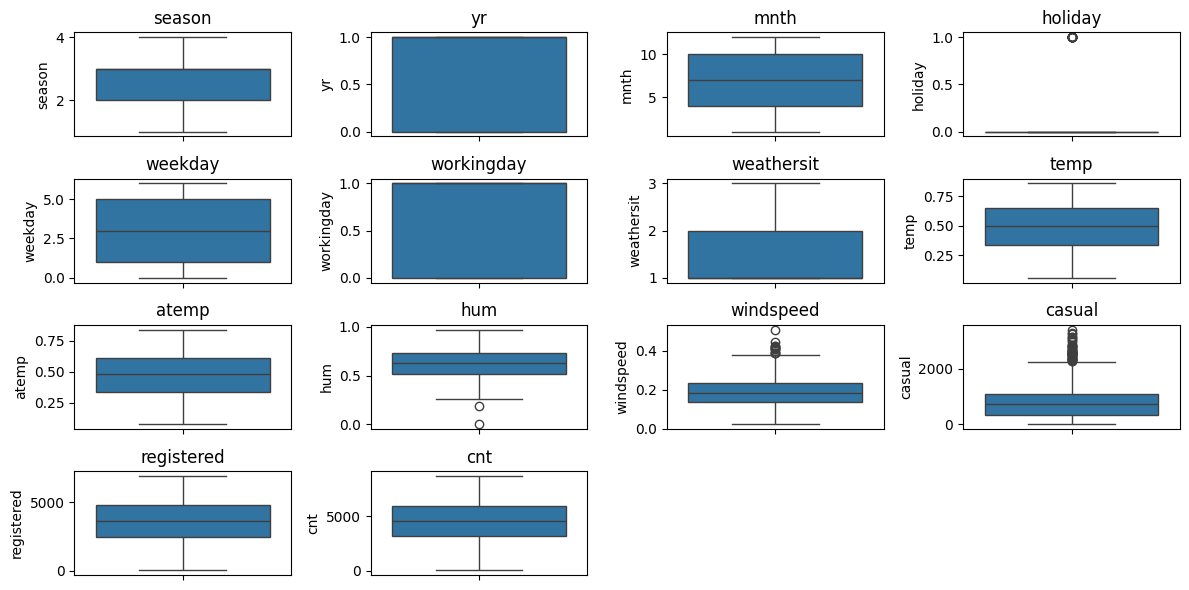

In [17]:
plt.figure(figsize=(12, 6))
num_cols = len(numericalday_columns)
rows = math.ceil(num_cols / 4)  
for index, column in enumerate(numericalday_columns):
    plt.subplot(rows, 4, index + 1)  
    sns.boxplot(y=day_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**Insight:**
- Pada tabel day_df feature yang teindikasi memiliki outliers adalah holiday, hum, windspeed, dan casual.
- Hal ini bis terjadi karena pada feature holiday merupakan tipe feature category dan bisa saja adanya ketimpangan antara holiday atau tidak, karena perbedaaan komposisi hari libur dan tidak
- untuk hum yang merupakan kelembapan udara dan winspeed yang merupakan kecepatan angin, bisa saja terjadi karena perubahan keadaan alam yang mungkin terjadi
- Selain itu, untuk feature casual yang merupakan jumlah orang yang melakukan transaksi secara tidak resmi, bisa saja terjadi karena perubahan keadaan keinginan masyarakat yang dinamis

In [18]:
numericalhour_columns = [x for x in hour_df.select_dtypes(include='number').columns if x != 'instant']
numericalhour_columns


['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

pada kode ini kita kan menggolongkan feature mana yang bertipe numerical pada hour_df

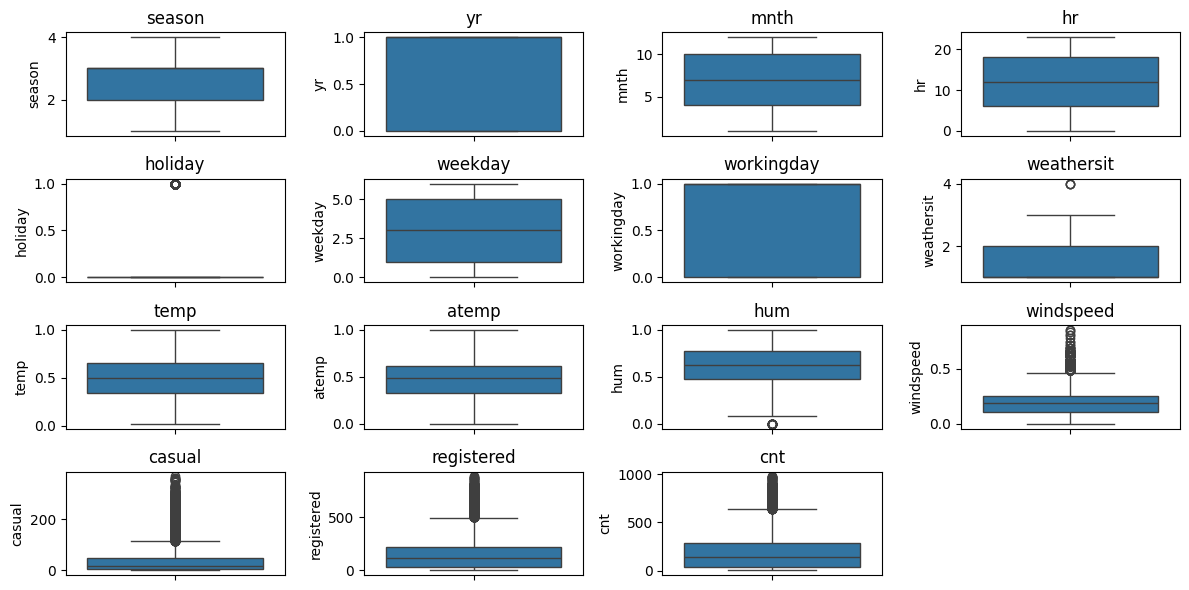

In [19]:
plt.figure(figsize=(12, 6))
num_cols = len(numericalhour_columns)
rows = math.ceil(num_cols / 4)  
for index, column in enumerate(numericalhour_columns):
    plt.subplot(rows, 4, index + 1)  
    sns.boxplot(y=hour_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**Insight:**
- Pada tabel hour_df feature yang teindikasi memiliki outliers adalah holiday, weathersit, hum, windspeed, casual, registered, dan cnt
- Hal ini bisa terjadi karena pada feature holiday dan weathersit yang merupakan tipe feature category yang bisa saja terjadi outlier bisa saja adanya ketimpangan antara holiday atau tidak dan bisa terjadi jika ada ketidakseimbangan dalam jumlah kejadian untuk kategori tertentu
- untuk hum yang merupakan kelembapan udara dan windspeed yang merupakan kecepatan angin, bisa saja terjadi karena perubahan keadaan alam yang mungkin terjadi
- Selain itu, untuk feature casual, registered, dan cth yang merupakan jumlah orang yang melakukan transaksi, bisa saja terjadi karena perubahan pola perilaku masyarakat

### Cleaning Data

#### Correcting Data Types

Pada tahap ini kita akan mengubah data types dteday pada day_df dan juga hour_df menjadi datetime

In [20]:
#Mengubah tipe data dteday menjadi datetime pada hour_day
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data Feature 'dteday' pada day_df berhasil diubah menjadi datetime

In [22]:
#Mengubah tipe data dteday menjadi datetime pada hour_day
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data Feature 'dteday' pada hour_df berhasil diubah menjadi datetime

#### Dropping Irrelevant Columns

Tahap ini berguna untuk menghapus columns yang tidak penting, untuk menyederhanakan dataframe

In [24]:
day_df.drop(columns=['instant'], inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [25]:
hour_df.drop(columns=['instant'], inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

Colomns instant di hapus pada day_df dan hour_df karena instant merupakan urutan data yang tidak diperlukan pada proses analisis ini

#### Confirm Labeling Data

Pada dataset tidak dijelaskan untuk feature holiday apa itu 0 dan 1.
Untuk mengetahuinya ktia bisa melihat dari hubungan antara holiday dan workingday.

working day adalah feature yang menandakan untuk hari kerja adalah 1 dan bukan hari kerja adalah 0.

Holiday sendiri adalah feature yang menandakan hari tersebut holiday (libur) atau tidak. 

Pada tahap ini kita akan mengetahui apa itu 0 dan 1.
Ketika feature 'workingday' bukan hari kerja (bernilai 0) sudah dipastikan feature 'holiday' akan bernilai holiday. Tidak mungkin ketika feature 'workingday' Hari Kerja (bernilai 1) feature 'holiday' akan bernilai libur

 Lebih lanjut dapat dilihat pada penjelasan dibawah: 

| workingday  | Holiday | Kemungkinan |
|---------------|------------------|------------------|
| Bukan Hari Kerja | Bukan Holiday   | ✅ |
| Bukan Hari Kerja | Holiday         | ✅ |
| Hari Kerja       | Bukan Holiday   | ✅ |
| Hari Kerja       | Holiday       | ❌ |


Sehingga dapat kita deteksi mana data yang merepresentasikan seperti diatas.

In [26]:
# Menghitung jumlah kemunculan kombinasi (0,0), (0,1), (1,0), dan (1,1)
combination_counts = day_df.groupby(['holiday', 'workingday']).size().unstack(fill_value=0)
print("\nJumlah Data untuk Setiap Kombinasi Holiday dan Workingday:")
print(combination_counts)


Jumlah Data untuk Setiap Kombinasi Holiday dan Workingday:
workingday    0    1
holiday             
0           210  500
1            21    0


sebelumnya untuk diketahui:
feature 'working day'
- hari kerja = 1 
- bukan hari kerja = 0


sebelumnya pasangan hari kerja dan holiday = ❌ pada diatas menyebutkan --> 1  dan 1 = 0
sehingga dapat disimpulkan untuk:
feature 'holiday'
- holiday = 1
- bukan holiday  = 0


In [27]:
holiday_mapping = {
    0: "Bukan Holiday",
    1: 'Holiday'

}
holiday_stats = day_df.groupby("holiday")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
holiday_stats["holiday"] = holiday_stats["holiday"].map(holiday_mapping)
print(holiday_stats)

         holiday      sum         mean   min   max
0  Bukan Holiday  3214244  4527.104225    22  8714
1        Holiday    78435  3735.000000  1000  7403


#### Feature Engineering

##### Pengelompokkan Hari

Selanjutnya kita akan membuat feature baru dengan mengelompokkan hari menjadi Hari Libur, Akhir Pekan, dan Hari Kerja untuk melihat tren peminjaman pada hari-hari tertentu

- Jika holiday = 1 (holiday), maka workingday pasti 0, karena hari libur bukan hari kerja.
- Jika holiday = 0 (bukan holiday), maka workingday bisa 0 atau 1, tergantung apakah hari tersebut akhir pekan atau bukan.
    - Jika hari tersebut adalah Senin–Jumat dan bukan hari libur → workingday = 1.
    - Jika hari tersebut adalah Sabtu/Minggu → workingday = 0

Sehingga:
- "Hari Libur Resmi" jika holiday = 1
- "Akhir Pekan" jika holiday = 0 & workingday = 0
- "Hari Kerja" jika workingday = 1

In [28]:
# Menambahkan kategori ke day_df
day_df["day_category"] = day_df.apply(lambda row: 
                                      "Hari Libur Resmi" if row["holiday"] == 1 else 
                                      "Akhir Pekan" if row["holiday"] == 0 and row["workingday"] == 0 else 
                                      "Hari Kerja", axis=1)

# Menghitung jumlah data di setiap kategori
day_category_counts = day_df["day_category"].value_counts().reset_index()
day_category_counts.columns = ["day_category", "count"]

# Menambahkan informasi day_category ke hour_df berdasarkan dteday
hour_df = hour_df.merge(day_df[["dteday", "day_category"]], on="dteday", how="left")

In [29]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_category
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Akhir Pekan
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Akhir Pekan
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Hari Kerja
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Hari Kerja
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Hari Kerja


In [30]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_category
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Akhir Pekan
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Akhir Pekan
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Akhir Pekan
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Akhir Pekan
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Akhir Pekan


In [31]:
print (day_category_counts)

       day_category  count
0        Hari Kerja    500
1       Akhir Pekan    210
2  Hari Libur Resmi     21


**Insight:**
- Fungsi pengelompokkan ini untuk mempermudah dalam melihat tren berdasarkan kategori hari, serta memisahkan hari libur yang bisa jadi terjadi pada hari senin-jumat, hari kerja(senin-jumat), dan Akhir Pekan
- Terlihat hari kerja memiliki jumlah paling banyak, diikuti akhir pekan, dan hari libur

## Exploratory Data Analysis (EDA)

### Unvariate Analysis

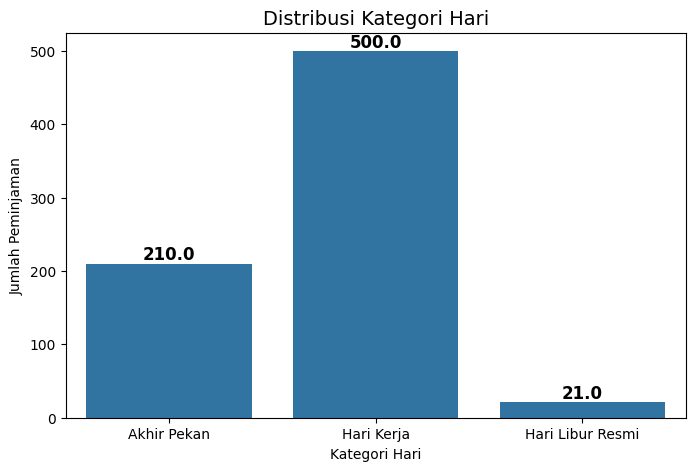

In [32]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="day_category", data=day_df)

# Menambahkan label jumlah di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')
plt.title("Distribusi Kategori Hari", fontsize=14)
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Persebaran data hari terbanyak masih berada pada hari kerja dengan jumlah 500, diikuti akhir pekan 210, dan hari libur 21

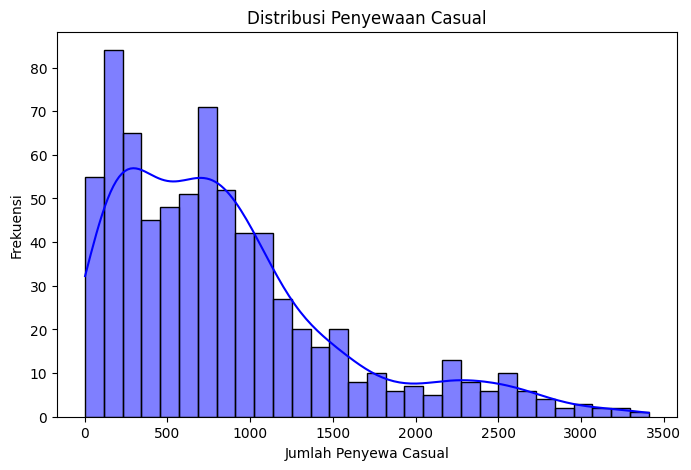

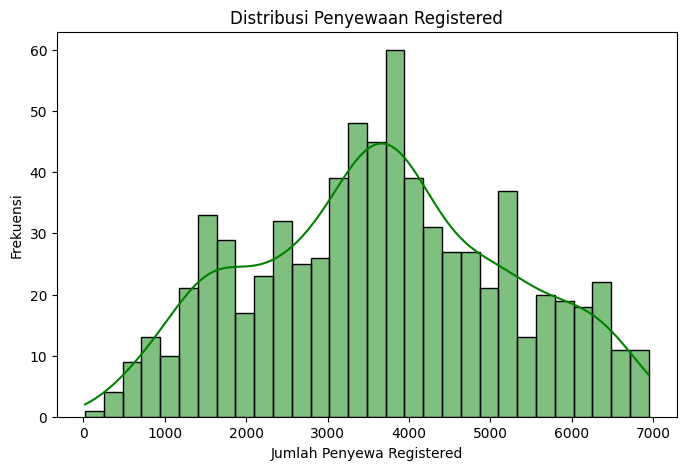

In [33]:
# Histogram Casual
plt.figure(figsize=(8, 5))
sns.histplot(day_df["casual"], bins=30, kde=True, color="blue")
plt.title("Distribusi Penyewaan Casual")
plt.xlabel("Jumlah Penyewa Casual")
plt.ylabel("Frekuensi")
plt.show()

# Histogram Registered
plt.figure(figsize=(8, 5))
sns.histplot(day_df["registered"], bins=30, kde=True, color="green")
plt.title("Distribusi Penyewaan Registered")
plt.xlabel("Jumlah Penyewa Registered")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi penyewaan casual atau tidak terdaftar sebagian besar terjadi dalam jumlah kecil hingga sedang (antara 0–1000 penyewa).
- Distribusi penyewaan registered atau terdaftar bentuk histogram mendekati distribusi normal (kurva lonceng), dengan sebagian besar penyewaan berkisar antara 2000 hingga 5000 penyewa per hari.

### Bivariate Analysis

Pada tahap ini akan dianalisis lebih lanjut khususnya untuk menjawab pertanyaan bisnis yang mengarah pada feature 'cth' yaitu jumlah peminjaman 

In [34]:
weekday_mapping = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}
weekday_stats = day_df.groupby("weekday")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
weekday_stats["weekday"] = weekday_stats["weekday"].map(weekday_mapping)
print(weekday_stats)

  weekday     sum         mean   min   max
0  Minggu  444027  4228.828571   605  8227
1   Senin  455503  4338.123810    22  7525
2  Selasa  469109  4510.663462   683  7767
3    Rabu  473048  4548.538462   441  8173
4   Kamis  485395  4667.259615   431  7804
5   Jumat  487790  4690.288462  1167  8362
6   Sabtu  477807  4550.542857   627  8714


In [35]:
workingday_mapping = {
    0: "Bukan Hari Kerja",
    1: 'Hari kerja'
}
workingday_stats = day_df.groupby("workingday")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
workingday_stats["workingday"] = workingday_stats["workingday"].map(workingday_mapping)
print(workingday_stats)

         workingday      sum         mean  min   max
0  Bukan Hari Kerja  1000269  4330.168831  605  8714
1        Hari kerja  2292410  4584.820000   22  8362


In [36]:
holiday_mapping = {
    0: "Bukan Holiday",
    1: 'Holiday'
}
holiday_stats = day_df.groupby("holiday")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
holiday_stats["holiday"] = holiday_stats["holiday"].map(holiday_mapping)
print(holiday_stats)

         holiday      sum         mean   min   max
0  Bukan Holiday  3214244  4527.104225    22  8714
1        Holiday    78435  3735.000000  1000  7403


**Insight:**
- Hari peminjaman paling tinggi berada pada hari jumat
- Hari kerja memiliki tingkat penyewaan lebih tinggi dibanding akhir pekan
- Hari libur menunjukkan jumlah penyewaan yang lebih rendah
- Untuk merangkum ketiga feature tersebut terhadap jumlah agar memisahkan hari-hari libur hari kerja kita akan menggunakan day_category

In [37]:
day_category_stats = day_df.groupby("day_category")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
print(day_category_stats)

       day_category      sum         mean   min   max
0       Akhir Pekan   921834  4389.685714   605  8714
1        Hari Kerja  2292410  4584.820000    22  8362
2  Hari Libur Resmi    78435  3735.000000  1000  7403


**Insight:**
- Hari Kerja (senin-jumat) Memiliki Jumlah Penyewaan Tertinggi dengan rata-rata tertinggi
- Penyewaan Lebih Rendah pada Hari Libur Resmi dengan rata-rata 3735
- Penyewaan rata-rata Tinggi di Akhir Pekan (Sabtu dan Minggu), Tapi Tidak Melebihi Hari Kerja

In [38]:
# Pengelompokkan Jumlah Data Peminjaman Berdasarkan Musim
season_labels = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
seasonal_trend = day_df.groupby("season")["cnt"].mean().reset_index()
seasonal_trend["season"] = seasonal_trend["season"].map(season_labels)
print(seasonal_trend)

         season          cnt
0    Musim Semi  2604.132597
1   Musim Panas  4992.331522
2   Musim Gugur  5644.303191
3  Musim Dingin  4728.162921


**Insight:**
- Musim Gugur memiliki jumlah penyewaan tertinggi dengan rata-rata 5644
- Musim Panas juga memiliki tingkat penyewaan yang tinggi dengan rata-rata 4992
- Penyewaan menurun di Musim Dingin dengan rata-rata 4728
- Musim Semi memiliki jumlah penyewaan terendah dengan rata-rata 2604

In [39]:
# Mengelompokkan berdasarkan tahun dan menghitung statistik peminjaman
yearly_rentals = day_df.groupby("yr")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
yearly_rentals["yr"] = yearly_rentals["yr"].map({0: "2011", 1: "2012"})
print(yearly_rentals)

     yr      sum         mean  min   max
0  2011  1243103  3405.761644  431  6043
1  2012  2049576  5599.934426   22  8714


**Insight:**
- Tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan tahun 2011

In [40]:
# Mengelompokkan berdasarkan jam dan menghitung statistik peminjaman
hourly_rentals = hour_df.groupby("hr")["cnt"].agg(["sum", "mean", "min", "max"]).reset_index()
print(hourly_rentals)

    hr     sum        mean  min  max
0    0   39130   53.898072    2  283
1    1   24164   33.375691    1  168
2    2   16352   22.869930    1  132
3    3    8174   11.727403    1   79
4    4    4428    6.352941    1   28
5    5   14261   19.889819    1   66
6    6   55132   76.044138    1  213
7    7  154171  212.064649    1  596
8    8  261001  359.011004    5  839
9    9  159438  219.309491   14  426
10  10  126257  173.668501    8  539
11  11  151320  208.143054   10  663
12  12  184414  253.315934    3  776
13  13  184919  253.661180   11  760
14  14  175652  240.949246   12  750
15  15  183149  251.233196    7  750
16  16  227748  311.983562   11  783
17  17  336860  461.452055   15  976
18  18  309772  425.510989   23  977
19  19  226789  311.523352   11  743
20  20  164550  226.030220   11  567
21  21  125445  172.314560    6  584
22  22   95612  131.335165    9  502
23  23   63941   87.831044    2  256


**Insight:**
- Puncak penyewaan lainnya terjadi pada pukul 8:00 dan 18:00.
- Penyewaan terendah terjadi pada dini hari, terutama pukul 3:00 hingga 5:00.

In [41]:
# Groupby berdasarkan day_category dan menjumlahkan casual serta registered
grouped_df = day_df.groupby('day_category')[['casual']].agg(['sum','min', 'mean', 'max'])
print(grouped_df)

                  casual                        
                     sum  min         mean   max
day_category                                    
Akhir Pekan       294373   54  1401.776190  3410
Hari Kerja        303285    2   606.570000  2469
Hari Libur Resmi   22359  117  1064.714286  3065


In [42]:
# Groupby berdasarkan day_category dan menjumlahkan casual serta registered
grouped_df = day_df.groupby('day_category')[['registered']].agg(['sum','min', 'mean', 'max'])
print(grouped_df)

                 registered                        
                        sum  min         mean   max
day_category                                       
Akhir Pekan          627461  451  2987.909524  5966
Hari Kerja          1989125   20  3978.250000  6946
Hari Libur Resmi      56076  573  2670.285714  5172


**Insight:**
- Pengguna terdaftar (registered) mendominasi penyewaan dibandingkan pengguna kasual (casual) di semua kategori hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan Hari-hari paling sibuk dalam penyewaaan sepeda?


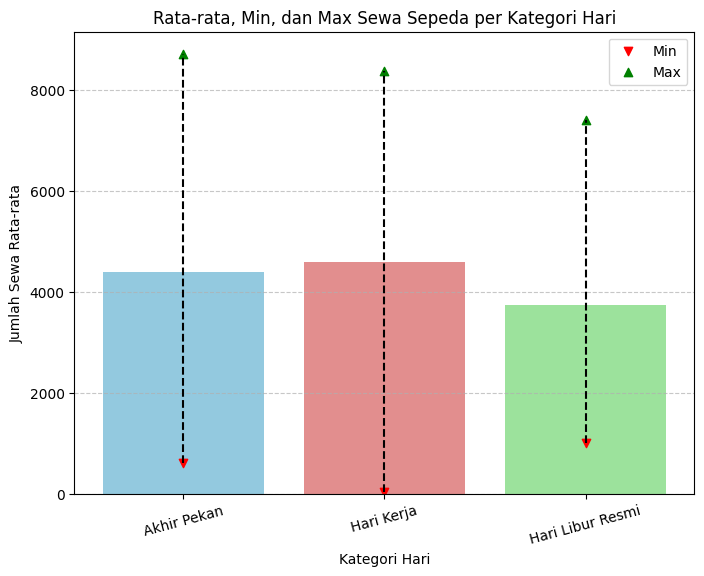

In [43]:
# Visualisasi Hari-hari plaing sibuk penyewaan sepeda
colors = ["skyblue", "lightcoral", "lightgreen"]
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=day_category_stats,
    x="day_category",
    y="mean",
    hue="day_category", 
    palette=colors,
    legend=False 
)
# Menambahkan garis yang menghubungkan min dan max
for i, row in enumerate(day_category_stats.itertuples()):
    plt.plot([i, i], [row.min, row.max], color="black", linestyle="--", linewidth=1.5)
    plt.scatter(i, row.min, color="red", marker="v", label="Min" if i == 0 else "")
    plt.scatter(i, row.max, color="green", marker="^", label="Max" if i == 0 else "")

plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Sewa Rata-rata")
plt.title("Rata-rata, Min, dan Max Sewa Sepeda per Kategori Hari")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
if "Min" in plt.gca().get_legend_handles_labels()[1]:
    plt.legend()
plt.show()

**Insight:**
Hari Kerja:
- Terlihat pada Hari kerja memiliki rata-rata penyewaan tertinggi dibandingkan dengan akhir pekan dan hari libur resmi, yang menunjukkan bahwa sepeda lebih sering digunakan pada hari kerja, kemungkinan besar untuk keperluan transportasi.
- Hari kerja juga memiliki penyewaan minimum yang paling rendah dibandingkan dengan kategori lainnya, yang menunjukkan adanya hari-hari dengan aktivitas penyewaan yang sangat rendah. Namun, hari kerja tetap memiliki penyewaan maksimum yang cukup tinggi, mendekati akhir pekan, yang berarti dalam hari-hari tertentu, penyewaan bisa mencapai puncak yang hampir setara dengan akhir pekan.

Akhir Pekan:
- Akhir pekan memiliki jumlah penyewaan yang cukup tinggi, namun sedikit lebih rendah dari hari kerja, yang bisa mengindikasikan bahwa sepeda lebih banyak digunakan untuk rekreasi pada hari pekan.
- Walaupun begitu, penyewaan maksimum pada akhir pekan lebih tinggi dibandingkan kategori lainnya, menunjukkan bahwa pada hari-hari tertentu di akhir pekan, penggunaan sepeda dapat melonjak secara signifikan. Selain itu, nilai minimum penyewaan pada akhir pekan juga lebih tinggi dibandingkan hari kerja, yang menunjukkan bahwa pada hari libur, penyewaan tetap relatif stabil dan tidak mengalami penurunan drastis seperti pada hari kerja tertentu.

Hari Libur Resmi:
- Hari libur resmi memiliki rata-rata penyewaan terendah, yang berarti pada hari libur besar, orang cenderung mengurangi aktivitas penyewaan sepeda dibandingkan hari kerja maupun akhir pekan.
- Meskipun penyewaan maksimum pada hari libur resmi lebih rendah dibandingkan hari kerja dan akhir pekan, nilai minimum penyewaan pada hari libur resmi lebih tinggi dibandingkan hari kerja. Hal ini menunjukkan bahwa pada hari libur resmi, jumlah penyewaan cenderung lebih stabil dan tidak mengalami penurunan ekstrem seperti pada hari kerja tertentu. Dengan kata lain, meskipun puncak penyewaan tidak terlalu tinggi, penggunaan sepeda pada hari libur resmi tetap terjaga dalam kisaran yang relatif stabil.

### Pertanyaan 2: Bagaimana pola tren peminjaman sepeda di setiap musim untuk masing-masing tahun?

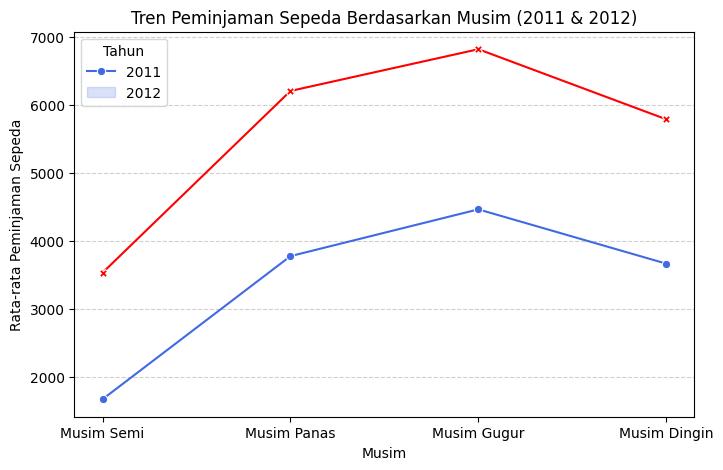

In [44]:
#Visualisasi Tren Peminjaman Sepeda Berdasarkan Musim
season_labels = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
seasonal_trend = day_df.groupby(["season", "yr"])["cnt"].mean().reset_index()
seasonal_trend["season"] = seasonal_trend["season"].map(season_labels)
order = ["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"]
seasonal_trend["season"] = pd.Categorical(seasonal_trend["season"], categories=order, ordered=True)

plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=seasonal_trend,
    x="season",
    y="cnt",
    hue="yr",
    style="yr",
    markers=True,
    dashes=False,
    palette=["royalblue", "red"]
)
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Musim (2011 & 2012)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**Insight:**
- Peminjaman sepeda cenderung meningkat dari musim semi ke musim panas dan mencapai puncaknya pada musim gugur untuk kedua tahun (2011 dan 2012). Ini menunjukkan bahwa cuaca yang lebih hangat dan kondisi yang lebih nyaman mendorong lebih banyak orang untuk menggunakan sepeda.
- Penurunan di Musim Dingin, kemungkinan disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung untuk bersepeda.
- Pola tren peminjaman sepeda dari musim ke musim relatif serupa untuk kedua tahun, dengan kenaikan dari musim semi ke musim panas, puncaknya di musim gugur, lalu penurunan di musim dingin. Hal ini menunjukkan bahwa tren musiman memiliki pola yang stabil dari tahun ke tahun.

### Pertanyaan 3: Bagaimana tren peminjaman sepeda dari tahun 2011 hingga 2012?

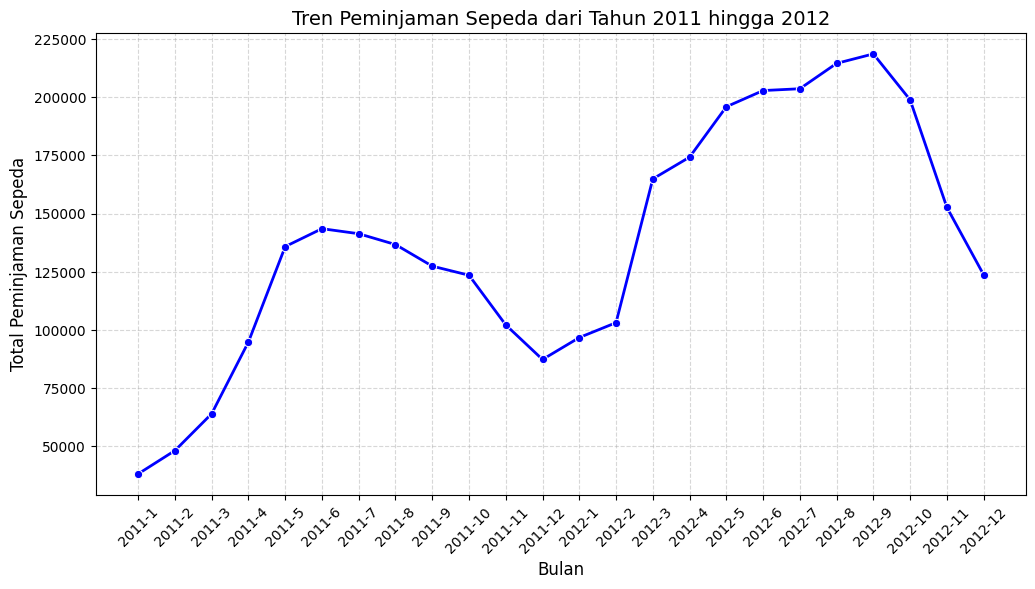

In [45]:
# Visualisasi Time Series dengan mengelompokkan data berdasarkan tahun dan bulan
monthly_trend = day_df.groupby(["yr", "mnth"])["cnt"].sum().reset_index()
monthly_trend["year_month"] = monthly_trend["yr"].map({0: 2011, 1: 2012}).astype(str) + "-" + monthly_trend["mnth"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x="year_month", y="cnt", data=monthly_trend, marker="o", linewidth=2, color="b")

plt.title("Tren Peminjaman Sepeda dari Tahun 2011 hingga 2012", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Peminjaman Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Insight:**
- Terdapat peningkatan jumlah peminjaman dari tahun 2011 ke tahun 2012
- Tren Peminjaman Sepeda menunjukkan tren meningkat dari awal tahun 2011 hingga pertengahan tahun, kemudian mengalami sedikit fluktuasi sebelum mencapai puncaknya pada pertengahan hingga akhir 2012. Setelah itu, peminjaman menurun menjelang akhir tahun 2012. Hal ini terjadi karena adanya musim tahunan yang terlihat pada visualisasi tren musiman pada pertanyaan nomor 2

### Pertanyaan 4: Bagaimana pola peminjaman sepeda berdasarkan jam pada hari-hari tertentu?

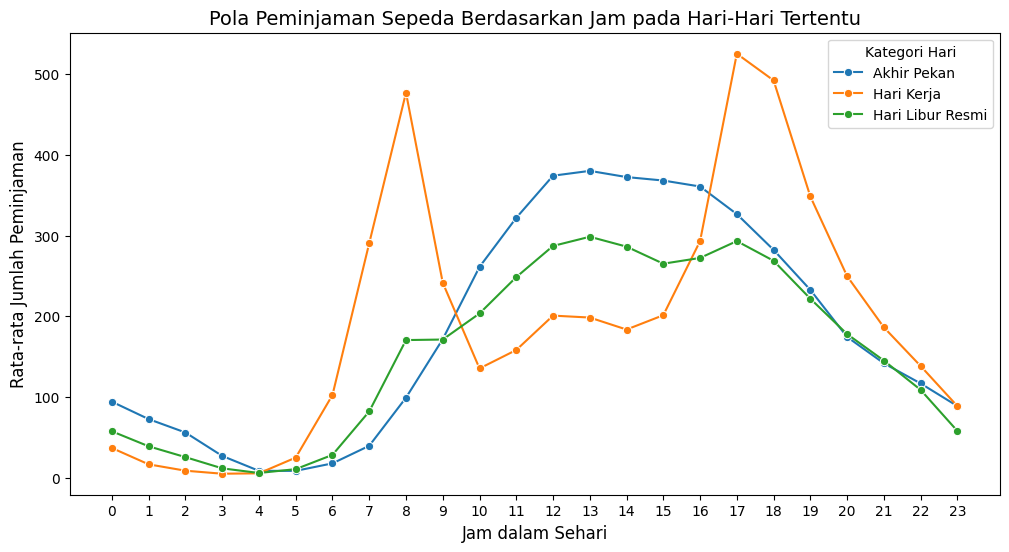

In [46]:
# Visualisasi pola peminjaman sepeda berdasarkan jam pada kategori hari
hourly_trend = hour_df.groupby(["hr", "day_category"])["cnt"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x="hr", y="cnt", hue="day_category", marker="o")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam pada Hari-Hari Tertentu", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.xticks(range(0, 24)) 
plt.legend(title="Kategori Hari")
plt.show()

**Insight:**
Hari Kerja:
- Pada hari kerja terdapat peningkatan pada jam 5 dan mulai turun apda jam 10. Hal ini mungkin karena pada jam tersebut merupakan jam berangkat kerja
- Pada jam 10-16 mendapatkan jumlah terendah. Hal ini mungkin karena orang-orang sudah berangkat kerja.
- Pada jam 16-19 mulai naik lagi. Hal ini mungkin karena orang-orang meminjam sepeda untuk pulang kerja.

Hari Pekan:
- PPada hari pekan, jumlah peminjaman meningkat secara bertahap tanpa lonjakan tajam di pagi hari. Hal ini mungkin karena pada hari tersebut sepeda lebih banyak digunakan untuk aktivitas rekreasi dibandingkan transportasi.
- Peminjaman mulai meningkat pada pukul 9 dan mencapai puncaknya pada pukul 16-18. Hal ini mungkin karena banyak orang meminjam sepeda untuk beraktivitas di sore hari.
- Pada pukul 18 ke atas, jumlah peminjaman mulai menurun hingga malam hari.

Hari Libur Resmi:
- Pada hari libur resmi, pola peminjaman mirip dengan hari pekan, tetapi jumlahnya sedikit lebih rendah secara keseluruhan.
- Peminjaman mulai meningkat pada pukul 9-10 dan mencapai puncak pertama. Hal ini mungkin karena banyak orang menggunakan sepeda untuk aktivitas santai di pagi hari.
- Puncak kedua terjadi pada pukul 16-17, tetapi jumlahnya tidak setinggi hari pekan maupun hari kerja. Hal ini mungkin karena beberapa orang lebih memilih aktivitas lain selain bersepeda saat hari libur besar.
- Pada pukul 18 ke atas, jumlah peminjaman mulai menurun hingga malam hari, mirip dengan tren pada hari pekan.

### Pertanyaan 5: Bagaimana perbandingan tren peminjaman sepeda antara pengguna terdaftar dan tidak terdaftar pada hari tertentu?

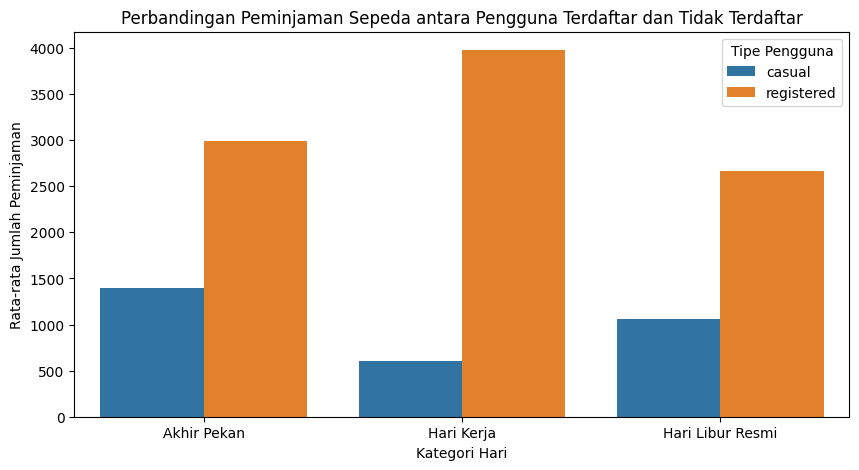

In [47]:
# Visualisasi Peminjaman Terdaftar dan Tidak Terdaftar
day_trend = day_df.groupby("day_category")[["casual", "registered"]].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=day_trend.melt(id_vars="day_category", var_name="User Type", value_name="Avg Count"),
            x="day_category", y="Avg Count", hue="User Type")

plt.title("Perbandingan Peminjaman Sepeda antara Pengguna Terdaftar dan Tidak Terdaftar")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Tipe Pengguna")
plt.show()

**Insight:**
- Dari hasil tersebut pengguna yang terdaftar mondominasi pada semua hari (akhir pekan, hari kerja, dan hari libur resmi). Hal ini mengindikasikan bahwa pengguna terdaftar lebih konsisten dalam menggunakan layanan ini, kemungkinan karena mereka mengandalkan sepeda sebagai bagian dari mobilitas rutin mereka.

## Conclusion


- **Kapan Hari-hari Paling Sibuk dalam Penyewaan Sepeda?**  
  Hari kerja menjadi hari dengan rata-rata peminjaman tertinggi dibandingkan akhir pekan dan hari libur resmi. Ini menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi harian, terutama untuk keperluan perjalanan kerja. Meskipun begitu, pada akhir pekan juga terjadi lonjakan peminjaman, terutama untuk aktivitas rekreasi, sementara hari libur resmi cenderung memiliki peminjaman yang lebih rendah dan lebih stabil dibandingkan kategori hari lainnya. 

- **Bagaimana Pola Tren Peminjaman Sepeda di Setiap Musim untuk Masing-masing Tahun?**  
  Tren peminjaman sepeda menunjukkan pola musiman yang konsisten, di mana peminjaman meningkat dari musim semi ke musim panas dan mencapai puncaknya pada musim gugur. Setelah itu, jumlah peminjaman mengalami penurunan signifikan di musim dingin, kemungkinan akibat cuaca yang kurang mendukung untuk bersepeda. Pola ini terlihat stabil baik pada tahun 2011 maupun 2012.

- **Bagaimana Tren Peminjaman Sepeda dari Tahun 2011 hingga 2012?**  
  Secara keseluruhan, terjadi peningkatan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012. Tren peminjaman menunjukkan pola kenaikan dari awal 2011 hingga pertengahan tahun, diikuti fluktuasi sebelum mencapai puncaknya pada pertengahan hingga akhir 2012. Setelah itu, peminjaman kembali mengalami penurunan menjelang akhir tahun 2012. Pola ini berkaitan dengan tren musiman yang telah teridentifikasi sebelumnya.

- **Bagaimana Pola Peminjaman Sepeda Berdasarkan Jam pada Hari-hari Tertentu?**  
  - **Hari Kerja:** Peminjaman meningkat signifikan pada pukul **05.00-09.00**, mencerminkan aktivitas perjalanan kerja. Jumlahnya kemudian menurun pada pukul **10.00-16.00** sebelum kembali meningkat pada pukul **16.00-19.00**, kemungkinan besar karena jam pulang kerja.  
  - **Akhir Pekan:** Peminjaman meningkat secara bertahap sepanjang hari, mencapai puncak pada pukul **16.00-18.00**, menandakan sepeda lebih banyak digunakan untuk aktivitas rekreasi. Setelah pukul **18.00**, jumlah peminjaman mulai menurun.  
  - **Hari Libur Resmi:** Pola peminjaman mirip dengan akhir pekan, tetapi jumlahnya sedikit lebih rendah. Puncak peminjaman terjadi pada pagi (**09.00-10.00**) dan sore (**16.00-17.00**), namun tidak setinggi hari kerja maupun akhir pekan. Setelah pukul **18.00**, peminjaman mulai berkurang.

- **Bagaimana Perbandingan Tren Peminjaman Sepeda antara Pengguna Terdaftar dan Tidak Terdaftar pada Hari Tertentu?**  
  Pengguna terdaftar secara konsisten mendominasi peminjaman sepeda pada semua hari (**hari kerja, akhir pekan, dan hari libur resmi**). Hal ini menunjukkan bahwa mereka lebih sering mengandalkan layanan ini sebagai bagian dari mobilitas rutin. Sementara itu, pengguna tidak terdaftar cenderung lebih aktif pada akhir pekan dan hari libur resmi, yang mengindikasikan bahwa mereka lebih banyak menggunakan sepeda untuk tujuan rekreasi dibandingkan transportasi sehari-hari.


## Menyimpan Data Akhir

In [48]:
day_df.to_csv("day_data.csv", index=False)

In [49]:
hour_df.to_csv("hour_data.csv", index=False)